In [1]:
# install dulu kalo belom punya
# !pip install session_info 

In [2]:
# math & tables module
import numpy as np
import pandas as pd

# plotting module
from matplotlib import pyplot as plt
import seaborn as sns

# module to show version used in project
import session_info

# statistics module
from scipy import stats as st
import statsmodels.stats.proportion as sp


In [3]:
# session module version
session_info.show()

In [4]:
# reading dataset
data = pd.read_csv("train.csv", sep=';')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Descriptive Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = data.select_dtypes(include=num_dtypes)

numericals = num_df.columns  
print(numericals)


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [8]:
category = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
numerical = ['age','balance','day','duration','campaign','pdays','previous']

In [9]:
ordinal = ['education','default','housing','loan','month','y','marital','poutcome']
nominal = ['job','contact']

### categorical variable detail

In [10]:
data[category].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


#### investigation for unknown value in categorical variable

##### there are unknown & other value

In [11]:
data.job.value_counts().to_frame().T

job,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student,unknown
count,9732,9458,7597,5171,4154,2264,1579,1487,1303,1240,938,288


In [12]:
data.education.value_counts().to_frame().T

education,secondary,tertiary,primary,unknown
count,23202,13301,6851,1857


In [13]:
data.contact.value_counts().to_frame().T

contact,cellular,unknown,telephone
count,29285,13020,2906


##### normal value

In [14]:
data.marital.value_counts().to_frame().T

marital,married,single,divorced
count,27214,12790,5207


In [15]:
data.default.value_counts().to_frame().T

default,no,yes
count,44396,815


In [16]:
data.poutcome.value_counts().to_frame().T

poutcome,unknown,failure,other,success
count,36959,4901,1840,1511


In [17]:
data.housing.value_counts().to_frame().T

housing,yes,no
count,25130,20081


In [18]:
data.loan.value_counts().to_frame().T

loan,no,yes
count,37967,7244


In [19]:
data.month.value_counts().to_frame().T

month,may,jul,aug,jun,nov,apr,feb,jan,oct,sep,mar,dec
count,13766,6895,6247,5341,3970,2932,2649,1403,738,579,477,214


In [20]:
data.y.value_counts().to_frame().T

y,no,yes
count,39922,5289


### numerical variabel detail

In [21]:
data[numerical].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Aneh: balance, pdays, previous

## Univariate Analysis

### numerical

In [22]:
data.age.mode()[0]

32

In [23]:
data[numerical].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [24]:
data[category].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


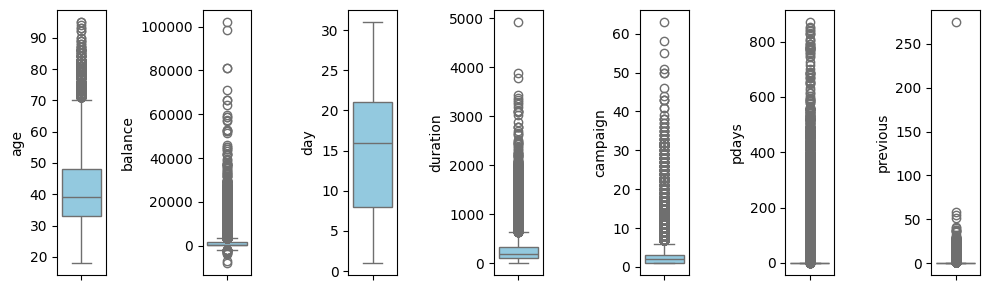

In [25]:
feature = numerical

plt.figure(figsize=(10,3))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.boxplot(y=data[feature[i]], color='skyblue', orient='v')
    plt.tight_layout()

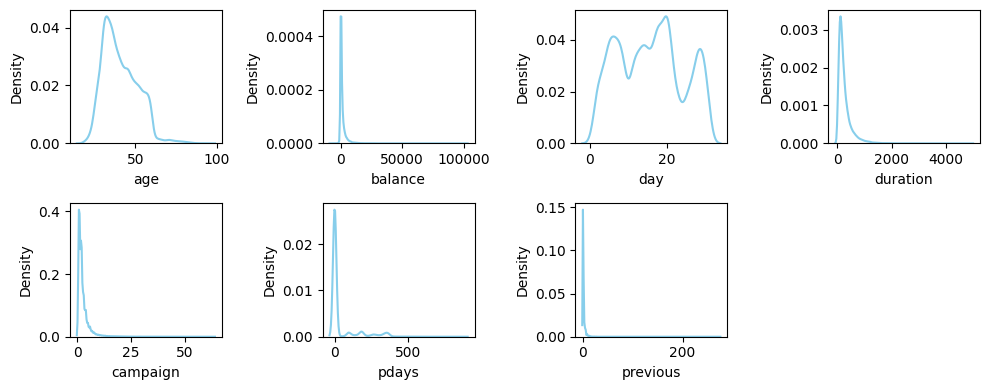

In [26]:
feature = numerical

plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.kdeplot(x=data[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

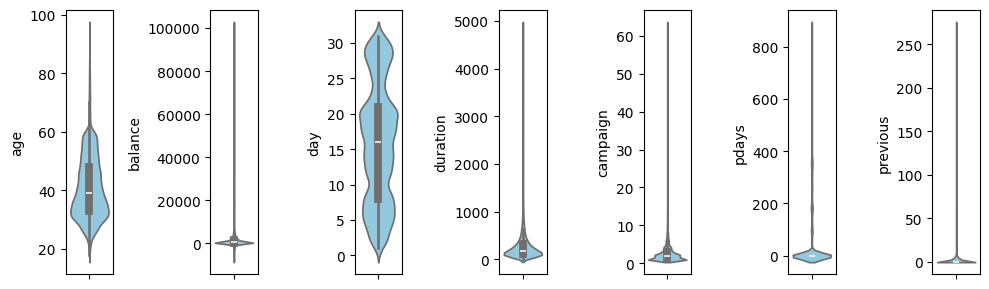

In [27]:
feature = numerical

plt.figure(figsize=(10,3))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.violinplot(y=data[feature[i]], color='skyblue')
    plt.tight_layout()

### categorical

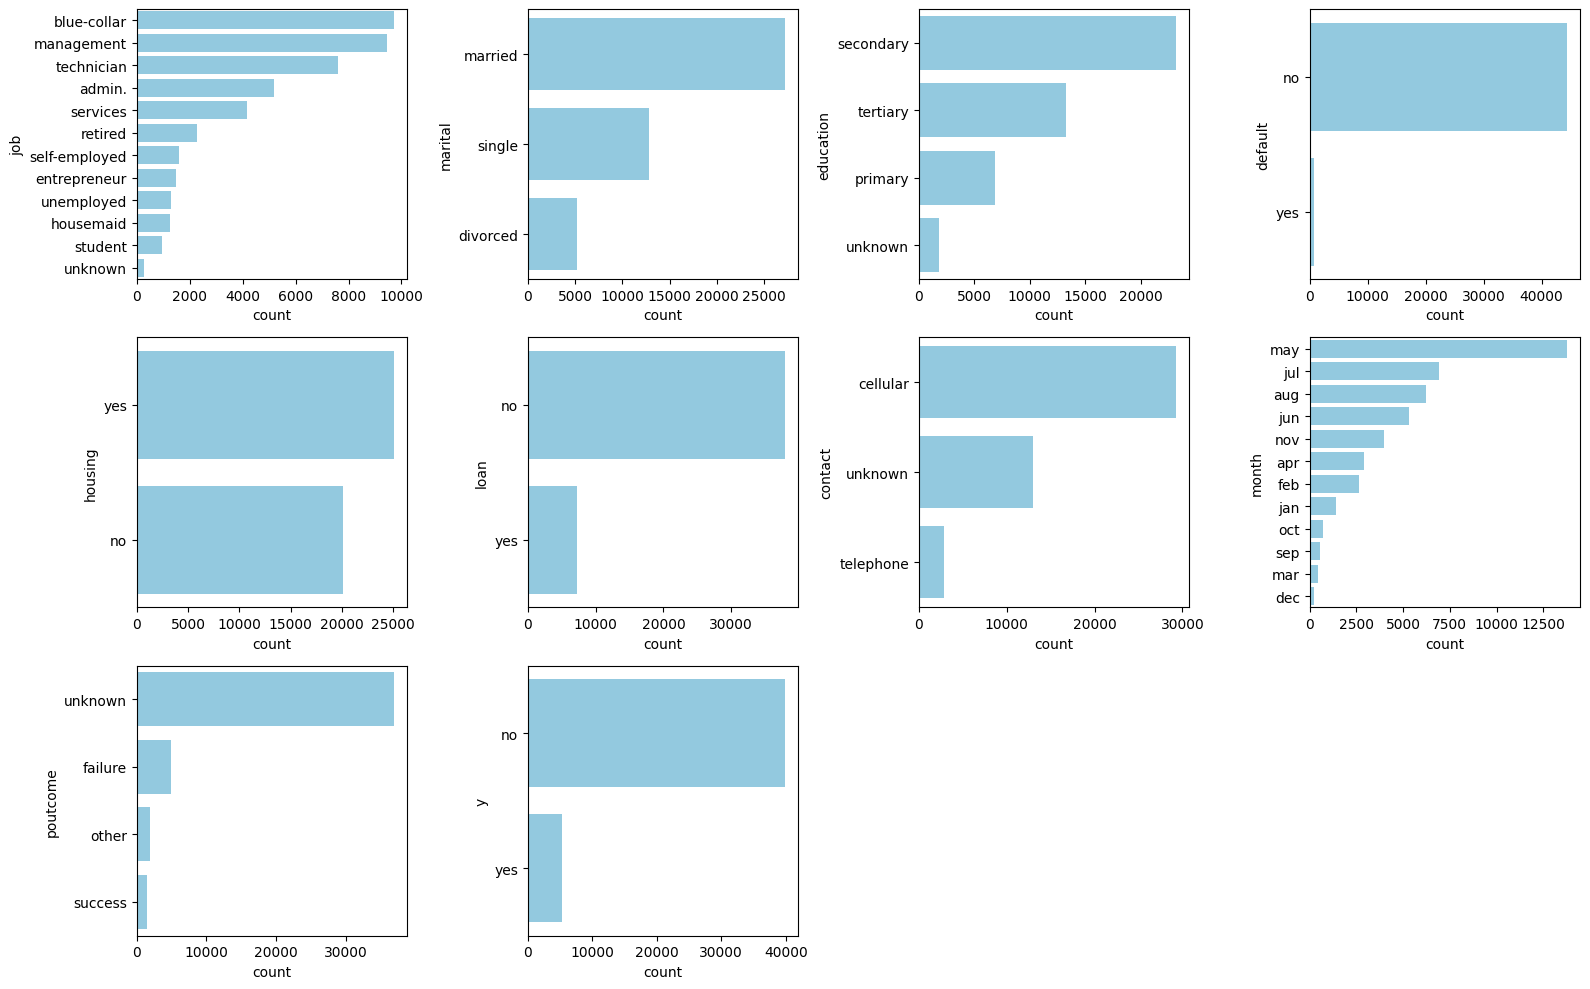

In [28]:
feature = category
plt.figure(figsize=(16,10))
for i in range(0,len(feature)):
    plt.subplot(3, 4, i+1)
    sns.countplot(y=data[feature[i]], color='skyblue', order=data[feature[i]].value_counts().index)
    plt.tight_layout() 

## Multivariate Analysis

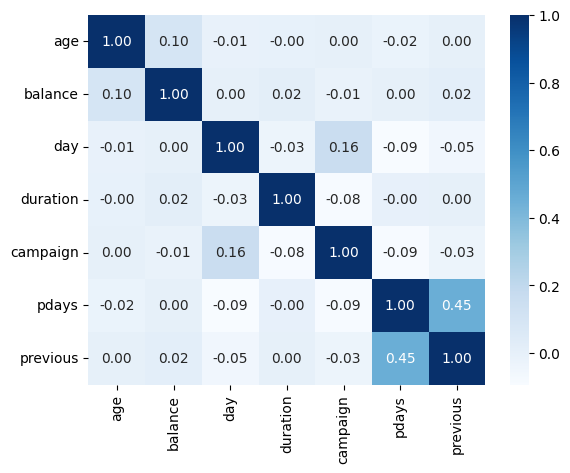

In [30]:
sns.heatmap(data[numerical].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

korelasi antarvariabel tidak ada yang memiliki hubungan yang kuat, namun ada yang memiliki hubungan positif yang cukup sedang yaitu antara variabel pdays dengan previous sebesar 0.45. Dimana jika pdays mengalami kenaikan, maka previous juga meningkat, begitupun sebaliknya. Kemudian disusul oleh hubungan antara campaign dan day sebesar 0.16. Untuk variabel lainnya memiliki hubungan yang sangat lemah karena mendekati nilai 0, bahkan tidak ada hubungan sama sekali antara variabel duration&previous, age&previous, balance&pdays, age&campaign, duration&age, day&balance.

In [ ]:
sns.pairplot(data[numerical], diag_kind='kde')
plt.show()

In [ ]:
sns.pairplot(data, diag_kind='kde', hue='y')
plt.show()

In [ ]:
sns.catplot(data, x='balance', y='job', height=5, aspect=2)
plt.show()

In [ ]:
sns.catplot(data, x='age', y='job', height=5, aspect=2)
plt.show()

## Business Insight

### Call Duration correlated to Conversion Rate

In [ ]:
data_used = data.loc[:,['duration', 'y']]

In [ ]:
data_used.sample(3)

In [ ]:
# distribution before pre-processing

sns.boxplot(data_used, x='duration')
plt.show()

In [ ]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['duration']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [ ]:
data_used.head()

In [ ]:
data_used = data_used.query("filtered_entries == True")

In [ ]:
# distribution after pre-processing

sns.boxplot(data_used, x='duration')
plt.show()

#### Hipotesis

> H0: Durasi Call Marketing **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Durasi Call Marketing **meningkatkan** keinginan nasabah membuka rekening term deposit

In [ ]:
# dividing duration to long and short using its median

parameter = data_used.duration.median()
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah duration yang lebih dari', parameter)

In [ ]:
control = data_used.query("duration <= 176")
treatment = data_used.query("duration > 176")

#### Marketing success rate identification

In [ ]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [ ]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [ ]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [ ]:
print('Conversion Rate Control :', round(cr_control*100, 2))

In [ ]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

#### Graph

In [ ]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)

#### z-value proportions

In [ ]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [ ]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

In [ ]:
if pvalue >= 0.05 :
    print('H0 diterima, Durasi Call Marketing tidak meningkatkan keinginan nasabah membuka rekening deposito')
else :
    print('H1 diterima, Durasi Call Marketing meningkatkan keinginan nasabah membuka rekening deposito')

#### Conclusion
Business insight yang didapatkan berdasarkan significance testing adalah bahwa durasi call marketing berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk call duration yang lebih lama (lebih dari 176 detik)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **meningkatkan call duration untuk setiap potential customer menjadi setidaknya selama 176 detik.**

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,24)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, hue=colors, palette=colors, legend=False)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,28,'Proportions of Customer Divide by its Call Duration Group', fontweight='bold', fontsize=16)
plt.text(-0.5,25,'From the chart can be seen, lower call duration group having less proportions than higher group\nThis shown that potential customer prefer having more duration call to be able to accept the offers', fontsize='14')
plt.xlabel('Call Duration Group', fontweight='bold', labelpad=8)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Low Call Duration Group Proportion\n(Less than equal 176 seconds)', 'High Call Duration Group Proportion\n(More than 176 seconds)'])

plt.show()

### Campaign Amount Correlated to Conversion Rate

In [ ]:
data_used = data.loc[:,['campaign', 'y']]

In [ ]:
data_used.sample(3)

In [ ]:
# distribution before pre-processing

sns.boxplot(data_used, x='campaign')
plt.show()

In [ ]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['campaign']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [ ]:
data_used.head()

In [ ]:
data_used = data_used.query("filtered_entries == True")

In [ ]:
# distribution after pre-processing

sns.boxplot(data_used, x='campaign')
plt.show()

#### Hipotesis

> H0: Jumlah Campaign **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Jumlah Campaign **meningkatkan** keinginan nasabah membuka rekening term deposit

In [ ]:
# dividing duration to long and short using its median

parameter = data_used.campaign.median()
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah duration yang lebih dari', parameter)

In [ ]:
control = data_used.query("campaign <= 2")
treatment = data_used.query("campaign > 2")

#### Marketing success rate identification

In [ ]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [ ]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [ ]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [ ]:
print('Conversion Rate Control :', round(cr_control*100, 2))

In [ ]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

#### Graph

In [ ]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)

#### z-value proportions

In [ ]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [ ]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

In [ ]:
if pvalue >= 0.05 :
    print('H0 diterima, Jumlah Campaign tidak meningkatkan keinginan nasabah membuka rekening term deposit')
else :
    print('H1 diterima, Jumlah Campaign meningkatkan keinginan nasabah membuka rekening term deposit')

#### Conclusion
Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah campaign yang pernah diberikan terhadap customer berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada control group yang merupakan data group untuk jumlah campaign yang lebih sedikit (kurang sama dengan 2)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **membatasi jumlah campaign untuk setiap potential customer menjadi paling banyak 2.**

#### Visualization

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,16)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors, legend=False)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,19,'Proportions of Customer Divide by its Campaign Group', fontweight='bold', fontsize=16)
plt.text(-0.5,17,'From the chart can be seen, lower campaign group having more proportions than higher group\nThis shown that customer prefer having less campaign promoted to them', fontsize='14')
plt.xlabel('Campaign Group Amount', fontweight='bold', labelpad=8)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Low Campaign Group Proportion\n(Less than equal 2)', 'High Campaign Group Proportion\n(More than 2)'])

plt.show()

### Contact Amount on Previous Campaign Group Correlated to Conversion Rate

In [ ]:
data_used = data.loc[:,['previous', 'y']]

In [ ]:
data_used.sample(3)

In [ ]:
# distribution before pre-processing

sns.boxplot(data_used, x='previous')
plt.show()

In [ ]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['previous']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [ ]:
data_used.sample(5)

In [ ]:
data_used = data_used.query("filtered_entries == True")

In [ ]:
# distribution after pre-processing

sns.boxplot(data_used, x='previous')
plt.show()

#### Hipotesis

> H0: Jumlah kontak pada campaign sebelumnya **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Jumlah kontak pada campaign sebelumnya **meningkatkan** keinginan nasabah membuka rekening term deposit

In [ ]:
# dividing duration to long and short using its median

parameter = data_used.previous.median()
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah kontak yang lebih dari', parameter)

In [ ]:
control = data_used.query("previous == 0")
treatment = data_used.query("previous > 0")

#### Marketing Success rate

In [ ]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [ ]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [ ]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [ ]:
print('Conversion Rate Control :', round(cr_control*100, 2))

In [ ]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

#### Graph

In [ ]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)
plt.show()

#### z-value proportions

In [ ]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [ ]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

In [ ]:
if pvalue >= 0.05 :
    print('H0 diterima, Jumlah kontak pada campaign sebelumnya tidak meningkatkan keinginan nasabah membuka rekening deposito')
else :
    print('H1 diterima, Jumlah kontak pada campaign sebelumnya meningkatkan keinginan nasabah membuka rekening deposito')

#### Conclusion
Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah kontak pada campaign sebelumnya berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk customer yang pernah di kontak (lebih dari 0)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **meningkatkan engangement kepada customer melalui kontak customer setidaknya sekali dalam satu campaign**

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,30)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');

plt.text(-0.5,35,'Proportions of Customer Divide by Amount of Contacted on Previous Campaign', fontweight='bold', fontsize=16)
plt.text(-0.5,31,'From the chart can be seen,\ncustomer that contacted on previous campaign having better conversion rate', fontsize=14)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xlabel('Amount of contact performed on previous campaign', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Not Contacted\n(equal to 0)', 'Contacted\n(More than 0)'])

plt.show()

### Last Day Contacted on Previous Campaign Group Correlated to Conversion Rate

In [ ]:
data_used = data.loc[:,['pdays', 'y']]

In [ ]:
# filtering for customer that have contacted only on previous campaign
data_used = data_used.query("pdays > -1")

In [ ]:
data_used.sample(3)

In [ ]:
# distribution before pre-processing

sns.boxplot(data_used, x='pdays')
plt.show()

In [ ]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['pdays']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [ ]:
data_used.sample(5)

In [ ]:
data_used = data_used.query("filtered_entries == True")

In [ ]:
# distribution after pre-processing

sns.boxplot(data_used, x='pdays')
plt.show()

#### Hipotesis

> H0: Jumlah hari dihubungi pada campaign sebelumnya **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Jumlah hari dihubungi pada campaign sebelumnya **meningkatkan** keinginan nasabah membuka rekening term deposit

In [ ]:
# dividing duration to long and short by manual parameter per 30days

parameter = 30
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah hari kontak terakhir yang lebih dari', parameter)

In [ ]:
control = data_used.query("pdays <= 30")
treatment = data_used.query("pdays > 30")

#### Marketing success rate identification

In [ ]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [ ]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [ ]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [ ]:
print('Conversion Rate Control :', round(cr_control*100, 2))

In [ ]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

#### Graph

In [ ]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)
plt.show()

#### z-value proportions

In [ ]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [ ]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

In [ ]:
if pvalue >= 0.05 :
    print('H0 diterima, Jumlah hari dihubungi pada campaign sebelumnya tidak meningkatkan keinginan nasabah membuka rekening deposito')
else :
    print('H1 diterima, Jumlah hari dihubungi pada campaign sebelumnya meningkatkan keinginan nasabah membuka rekening deposito')

#### Conclusion

Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah hari dihubungi pada campaign sebelumnya berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk customer yang yang dihubungi pada rentang yang lebih lama (lebih dari 30 hari)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **membuat durasi antar campaign menjadi lebih panjang, lebih dari 30 hari**

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,30)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors, legend=False)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,35,'Proportions of Customer Divide by Last Days Contacted on Previous Campaign', fontweight='bold', fontsize=16)
plt.text(-0.5,31,'From the chart can be seen,\ncustomer that contacted on longer than 1 month from previous campaign having better conversion rate', fontsize=14)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xlabel('Last Days Conctacted from previous campaign', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Low Previous Campaign Days\n(less than equal to 30 days)', 'High Campaign Previous Days\n(More than 30 days)'])

plt.show()

### Hubungan last day contacted of the month terhadap Conversion rate

In [ ]:
data_used = data.loc[:,['day', 'y']]

In [ ]:
data_used.sample(3)

In [ ]:
# distribution before pre-processing

sns.boxplot(data_used, x='day')
plt.show()

#### Hipotesis

> H0: Jumlah hari dihubungi **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Jumlah hari dihubungi  **meningkatkan** keinginan nasabah membuka rekening term deposit

In [ ]:
# dividing duration to long and short by manual parameter per 30days

parameter = 15
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah hari kontak terakhir yang lebih dari', parameter)

In [ ]:
control = data_used.query("day <= 15")
treatment = data_used.query("day > 15")

#### Marketing success rate identification

In [ ]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [ ]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [ ]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [ ]:
print('Conversion Rate Control :', round(cr_control*100, 2))

In [ ]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

#### Graph

In [ ]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)
plt.show()

#### z-value proportions

In [ ]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [ ]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

In [ ]:
if pvalue >= 0.05 :
    print('H0 diterima, Jumlah hari dihubungi tidak meningkatkan keinginan nasabah membuka rekening deposito')
else :
    print('H1 diterima, Jumlah hari dihubungi meningkatkan keinginan nasabah membuka rekening deposito')

#### Conclusion

Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah hari dihubungi berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk customer yang dihubungi pada rentang yang lebih cepat (kurang dari 15 hari)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **membuat durasi contact terakhir, lebih pendek maksimal 15 hari**

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,17)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,20,'Proportions of Customer Divide by Last Days Contacted', fontweight='bold', fontsize=16)
plt.text(-0.5,18,'From the chart can be seen,\ncustomer that contacted on longer than 15 days having better conversion rate', fontsize=14)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xlabel('Last Days Contacted', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Low Contacted Days\n(less than equal to 15 days)', 'High Contacted Days\n(More than 15 days)'])

plt.show()

### Hubungan Kelompok Balance Nasabah terhadap Conversion Rate

In [ ]:
data_used = data.loc[:,['balance', 'y']]

In [ ]:
data_used.sample(3)

In [ ]:
# distribution before pre-processing

sns.boxplot(data_used, x='balance')
plt.show()

In [ ]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['balance']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [ ]:
data_used.head()

In [ ]:
data_used = data_used.query("filtered_entries == True")

In [ ]:
# distribution after pre-processing

sns.boxplot(data_used, x='balance')
plt.show()

#### Hipotesis

> H0: Jumlah balance **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Jumlah balance **meningkatkan** keinginan nasabah membuka rekening term deposit

In [ ]:
# dividing duration to long and short using its median

parameter = data_used.balance.mean()
print('Berdasarkan pencarian pemusatan, \nDidapatkan parameter jumlah adalah duration yang lebih dari', parameter)

In [ ]:
control = data_used.query("balance <= 1084.5444834255386")
treatment = data_used.query("balance > 1084.5444834255386")

#### Marketing success rate identification

In [ ]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [ ]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [ ]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [ ]:
print('Conversion Rate Control :', round(cr_control*100, 2))

In [ ]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

#### Graph

In [ ]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)

#### z-value proportions

In [ ]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [ ]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

In [ ]:
if pvalue >= 0.05 :
    print('H0 diterima, Jumlah Balance tidak meningkatkan keinginan nasabah membuka rekening term deposit')
else :
    print('H1 diterima, Jumlah Balance meningkatkan keinginan nasabah membuka rekening term deposit')

#### Conclusion
Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah kelompok balance customer berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk jumlah kelompok balance diatas rata-rata (kurang sama dengan 1084 euro)**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **menghubungi kelompok balance yang diatas rata-rata.**

#### Visualization

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,17)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,19,'Proportions of Customer Divide by its Balance Group', fontweight='bold', fontsize=16)
plt.text(-0.5,18,'From the chart can be seen, higher balance group having more proportions than lower balance group', fontsize='14')
plt.xlabel('Balance Group', fontweight='bold', labelpad=8)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Low Balance Group Proportion\n(Less than equal 1084 euros)', 'High Balance Group Proportion\n(More than 1084 euros)'])

plt.show()

### Hubungan Kelompok Umur terhadap Conversion Rate

In [ ]:
data_used = data.loc[:,['age', 'y']]

In [ ]:
data_used.sample(3)

In [ ]:
# distribution before pre-processing

sns.boxplot(data_used, x='age')
plt.show()

In [ ]:
# preprocessing to eliminate outliers

z_scores = np.abs(st.zscore(data_used['age']))
data_used['abs_zscore'] = z_scores

filtered_entries = (z_scores < 3)
data_used['filtered_entries'] = filtered_entries

In [ ]:
data_used.head()

In [ ]:
data_used = data_used.query("filtered_entries == True")

In [ ]:
# distribution after pre-processing

sns.boxplot(data_used, x='age')
plt.show()

#### Hipotesis

> H0: Kelompok Umur **tidak meningkatkan** keinginan nasabah membuka rekening term deposit

> H1: Kelompok Umur **meningkatkan** keinginan nasabah membuka rekening term deposit

In [ ]:
# dividing duration to long and short using its median

parameter = 20
print('Berdasarkan pencarian pemusatan, Didapatkan parameter jumlah adalah duration yang lebih dari', parameter)

In [ ]:
control = data_used.query("age <= 20")
treatment = data_used.query("age > 20")

#### Marketing success rate identification

In [ ]:
success_control = control.query("y != 'no'").y.count()
success_treatment = treatment.query("y != 'no'").y.count()

In [ ]:
obs_control = control.shape[0]
obs_treatment = treatment.shape[0]

In [ ]:
cr_control = success_control/obs_control
cr_treatment = success_treatment/obs_treatment

In [ ]:
print('Conversion Rate Control :', round(cr_control*100, 2))

In [ ]:
print('Conversion Rate Treatment : ', round(cr_treatment*100,2))

#### Graph

In [ ]:
x = ['control', 'treatment']
value = [cr_control, cr_treatment]
plt.bar(x, value)

#### z-value proportions

In [ ]:
success = [success_control, success_treatment]
obs = [obs_control, obs_treatment]

stats, pvalue = sp.proportions_ztest(success,obs)

In [ ]:
print('P-value yang dihasilkan melalui uji z-value proportions adalah: ', pvalue)

In [ ]:
if pvalue >= 0.05 : 
    print('H0 diterima, Kelompok Umur tidak meningkatkan keinginan nasabah membuka rekening term deposit')
else :
    print('H1 diterima, Kelompok Umur meningkatkan keinginan nasabah membuka rekening term deposit')

#### Conclusion
Business insight yang didapatkan berdasarkan significance testing adalah bahwa jumlah kelompok umur customer berpengaruh terhadap keinginan nasabah untuk dapat membuka rekening term deposit. **Conversion rate terjadi lebih baik pada treatment group yang merupakan data group untuk jumlah kelompok kelompok umur di bawah sama dengan 20.**

**Business recomendation** yang dapat diberikan berdasarkan insight ini untuk meningkatkan conversion rate adalah dengan **menghubungi kelompok umur yang di bawah sama dengan 20.**

#### Visualization

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ylim(0,45)
plt.xlim(0,3)
value = [round(cr_control*100,2),round(cr_treatment*100,2)]
colors = ['grey' if (x < max(value)) else 'yellow' for x in value ]

ax = sns.barplot(x = ['control', 'treatment'], y= value, errorbar=None, palette=colors, hue=colors)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold');
ax.bar_label(ax.containers[1], fontsize=12, fontweight='bold');


plt.text(-0.5,48,'Proportions of Customer Divide by its Age Group', fontweight='bold', fontsize=16)
plt.text(-0.5,46,'From the chart can be seen, lower age group having better conversion rate', fontsize='14')
plt.xlabel('Age Group', fontweight='bold', labelpad=8)
plt.ylabel('Customer Percentages (%)', fontweight='bold', labelpad=20)
plt.xticks([0,1],['Lower Age Group Proportion\n(Less than equal 20 y.o)', 'High Age Group Proportion\n(More than 20 y.o)'])

plt.show()